# Análise Exploratória - Dados de Reclamações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Abra o arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` que você criou no exercício de Limpeza de Dados e faça as análises e exibições iniciais do conteúdo.

Responda: Qual a média das idades das pessoas que reclamaram? Qual a idade máxima? Quantos valores únicos possuímos para a coluna `BAIRRO_ASS`?

**Dica:** A função len() pode ser usada para se obter o tamanho de listas, séries ou dataframes. Por exemplo, `len([1,3,9])` retorna 3.

In [31]:
# Resposta:
import pandas as pd

df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [32]:
# Resposta:
df.head(5)

DATA   HORARIO                           ASSUNTO     BAIRRO_ASS SEXO  \
0  2016-09-12  01:28:16  ABORDAGEM SOCIAL DE RUA - ADULTO         centro    M   
1  2016-12-11  02:29:24  ABORDAGEM SOCIAL DE RUA - ADULTO         centro    M   
2  2017-11-01  12:11:12                        CRM-AF/SMS  sao francisco    F   
3  2016-12-14  10:19:29                        CRM-AF/SMS  sao francisco    F   
4  2016-06-12  19:01:01  ABORDAGEM SOCIAL DE RUA - ADULTO         centro    M   

    DATA_NASC                                     RESPOSTA_FINAL  HORA  IDADE  
0  1997-04-06  A pessoa da solicitação já faz parte da rede d...     1     19  
1  1971-12-29  A pessoa da solicitação já faz parte da rede d...     2     45  
2  1957-04-08  Alendronato de sódio 70 mg e Carbonato de cálc...    12     60  
3  1938-08-18  ALENDRONATO DE SÓDIO 70 MG  E CARBONATO DE CÁL...    10     78  
4  1980-02-13  EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...    19     36

## Visualização da distribuição das variáveis

Exiba histogramas para visualizar a distribuição de idades para homens e mulheres.

Responda: Existe alguma diferença na distribuição das idades entre homens e mulheres?

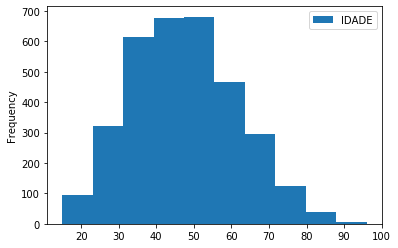

In [27]:
# Resposta:
idade_m = df[df['SEXO'] == 'M']
idade_m[['IDADE']].plot.hist(by='IDADE')

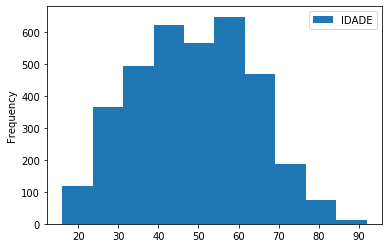

In [26]:
# Resposta:
idade_f = df[df['SEXO'] == 'F']
idade_f[['IDADE']].plot.hist()

Exiba um BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

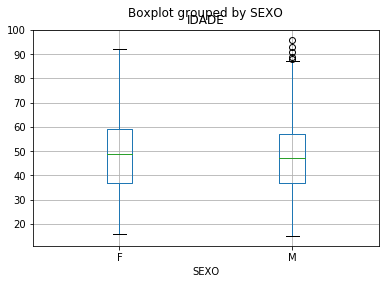

In [28]:
# Resposta:
df.boxplot(column='IDADE', by='SEXO')

## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 reclamações. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [46]:
# Resposta:
df_grouped = df.groupby('ASSUNTO').size().reset_index(name='CONTAGEM')
df_grouped
top60 = df_grouped[df]

ASSUNTO  CONTAGEM
0                     ABORDAGEM SOCIAL DE RUA - ADULTO       321
1                    ABORDAGEM SOCIAL DE RUA - CRIANÇA        16
2                                           AFORAMENTO         1
3                                              ANIMAIS       116
4                                   ANIMAIS DOMÉSTICOS       107
..                                                 ...       ...
140                   VIGILÂNCIA SANITÁRIA DE PRODUTOS         3
141           VIGILÂNCIA SANITÁRIA EM ESTABELECIMENTOS        27
142  VIGILÂNCIA SANITÁRIA EM HOSPITAIS, CLÍNICAS  E...         1
143                                             ÁRVORE        93
144                                             ÔNIBUS         9

[145 rows x 2 columns]

In [ ]:
# Resposta:

Crie um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [ ]:
# Resposta:

## Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [ ]:
# Resposta:

Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [ ]:
# Resposta:

Use um Heatmap para exibir as correlações com cores.

In [ ]:
# Resposta:

É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais reclamações.

- Crie um DataFrame com a contagem de reclamações por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais reclamações

In [ ]:
# Resposta:

In [ ]:
# Resposta:

O problema de considerar apenas o total de reclamações é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de reclamações, ou seja, o número de reclamações por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [ ]:
# Resposta:

Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de reclamações pela coluna de total de habitantes.

In [ ]:
# Resposta:

Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de reclamações.

In [ ]:
# Resposta:

## Analisando tendências temporais

Vamos agora identificar os meses com mais reclamações. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando as reclamações por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [ ]:
# Resposta:

In [ ]:
# Resposta: